<h1 align='center' style="color: blue;">Blown by Style - Fashion MNIST</h1>

This data science project lets one take the picture of the apparel randomly to classify it and further suggest similar-looking items from the data. For this project, we will look how supervised learning algorithms help us to classify personal fashion apparel images after training data from the Fashion mnist dataset. Various Supervised learning models are trained, tuned, and tested to see the correctness it shows towards classifying. Depending on the aim, we compare various models and select the one that proves to satisfy the needs. In the end, the best suitable model is tested with real life fashion apparels to conclude how correct our model can classify.In the end, the classified test sample is fed to bunch of models which picks top 5 images which closely resembles to it.

In [1]:
import tensorflow as tf
tf.__version__

'2.10.0'

Now, it's time to load the dataset

In [196]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

As can be seen from the above code, the dataset was divided into train and test sets. Let's take a look at the X_train

As it is clear, the train dataset (`X_train`) contains 60,000 images of size 28 x 28. We can visualize one of the images using the following code:

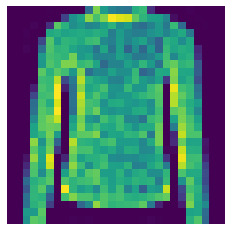

In [131]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sample_image = X_train[2222]
plt.imshow(sample_image)
plt.axis('off')
plt.show()

The `y_train` also includes values between 0 and 9. Each represents a particular category. For example, we can check the value of `y_train` for the above image.

In [105]:
y_train[10]

0

The above code shows that the image belongs to category 0. To get the associated label with each category, you can use the following code:

In [199]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(class_names[y_train[10]])

T-shirt/top


<ul>
    <li><b>Task1:</b> We will use the train set to train various supervised models and evaluate their performance using the test set.</li>
     <li><b>Task2:</b> We will use the best model to predict our own fashion pieces.</li>
    
</ul>

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
import numpy as np
import seaborn as sns

In [200]:
# Since our dataset is already grayscaled we need not do further processing.
# However we need to flatten out each image with total of 60000 for training and set and 10000 for testing set.
# Further we will normalize the data for faster training computation.
# For normalization we simply divide the data with 255, since our minimum here is 0(MinMax = x - xmin/xmax - xmin)

X_train = X_train.reshape((60000,28*28))
X_train = X_train/255
X_test = X_test.reshape((10000,28*28))
X_test = X_test/255

In [133]:
X_train[0].shape

(784,)

In [6]:
accuracy = []
precision = []
recall = []

# Logistic Regression

In [17]:
# training and testing the simple logistic model initially

from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(max_iter=1000)

model1.fit(X_train, y_train)

y_pred_model1 = model1.predict(X_test)

print("Accuracy score for Logistic Regression initially: ", accuracy_score(y_pred_model1, y_test, normalize=True)*100)

Accuracy score for Logistic Regression initially:  84.45


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
# creating a stratified 5-fold cross validation
cv = StratifiedKFold(n_splits=3, random_state=0, shuffle=True)

In [18]:
# Tuning hyperparameters for logistic Regression with parameters: penalty, type of solver and C value.

param_grid = {'penalty': ['l1', 'l2'],
              'solver': ['lbfgs', 'newton-cg', 'liblinear'],
             'C': [0.01, 0.1, 1.0, 10, 100]}

# We use Random Search tuning for faster results considering large dataset. We iter over 10 times(n_iter) with scoring accuracy.
model1_randomsearch = RandomizedSearchCV(estimator = LogisticRegression(max_iter = 1000),
                            param_distributions = param_grid,
                           n_iter = 10,
                           cv=cv,
                           scoring='accuracy',
                           return_train_score=True)

model1_randomsearch.fit(X_train, y_train)

print("Best parameters for Logistic Rgeression: ", model1_randomsearch.best_params_)
print("Best Cross-validation score for Logistic Regression: ", model1_randomsearch.best_score_)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:61

Best parameters for Logistic Rgeression:  {'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.1}
Best Cross-validation score for Logistic Regression:  0.8563666666666667


In [1044]:
model1 = model1_randomsearch.best_estimator_

y_pred_model1 = model1.predict(X_test)
accuracy.append(accuracy_score(y_pred_model1, y_test, normalize=True)*100)

print("Accuracy score for Logistic Regression with tuned hyper-parameters: ", accuracy_score(y_pred_model1, y_test, normalize=True)*100)

Accuracy score for Logistic Regression with tuned hyper-parameters:  84.61


Confusion matrix for Logistic Regression



<AxesSubplot:>

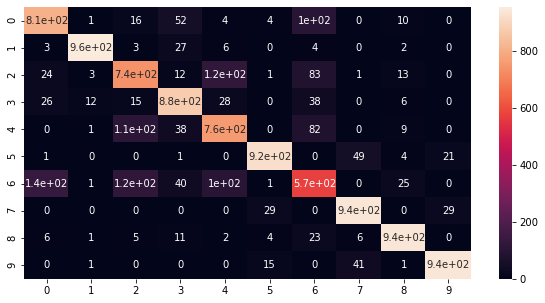

In [1027]:
print("Confusion matrix for Logistic Regression\n")
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, y_pred_model1), annot=True)

We can see from the confusion matrix that minimum no of correct predictions are for class 6,Shirt, and considerable amount of images are predicted as class 0(Top/T-shirt),class 2(Pullover) and class 4(Coat)

In [1051]:
print("\nClassification Report for Logistic regression:")
print(classification_report(y_test, y_pred_model1))
precision.append(precision_score(y_test,y_pred_model1, average=None))
recall.append(recall_score(y_test, y_pred_model1, average=None))


Classification Report for Logistic regression:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1000
           1       0.98      0.95      0.97      1000
           2       0.73      0.74      0.73      1000
           3       0.83      0.88      0.85      1000
           4       0.74      0.76      0.75      1000
           5       0.94      0.92      0.93      1000
           6       0.63      0.57      0.60      1000
           7       0.91      0.94      0.92      1000
           8       0.93      0.94      0.94      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.84      0.85      0.85     10000
weighted avg       0.84      0.85      0.85     10000



From the classification report, we see that precision for class 1 is highest which depicts that 98% of the images with class 1 are correctly predicted and poorest prediction is for class 6. Hence, we can conclude that logistic regression works poorly to predict class 6(Shirt).

In [196]:
from sklearn.naive_bayes import MultinomialNB

model2 = MultinomialNB()

model2.fit(X_train, y_train)

y_pred_model2 = model2.predict(X_test)

print("Accuracy score for Multinomial Naive Bayes initially: ", accuracy_score(y_pred_model2, y_test, normalize=True)*100)

Accuracy score for Multinomial Naive Bayes initially:  65.52


In [22]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0]}

model2_randomsearch = GridSearchCV(estimator = MultinomialNB(),
                            param_grid = param_grid,
                           cv=cv,
                           scoring='accuracy',
                           return_train_score=True)

model2_randomsearch.fit(X_train, y_train)

print("Best parameters for Multinomial Naive Bayes: ", model2_randomsearch.best_params_)
print("Best Cross-validation score for Multinomial Naive Bayes: ", model2_randomsearch.best_score_)

Best parameters for Multinomial Naive Bayes:  {'alpha': 0.01}
Best Cross-validation score for Multinomial Naive Bayes:  0.66685


In [1053]:
model2 = model2_randomsearch.best_estimator_

y_pred_model2 = model2.predict(X_test)
accuracy.append(accuracy_score(y_pred_model2, y_test, normalize=True)*100)

print("Accuracy score for Multinomial Naive Bayes with tuned hyper-parameters: ", accuracy_score(y_pred_model2, y_test, normalize=True)*100)

Accuracy score for Multinomial Naive Bayes with tuned hyper-parameters:  65.53999999999999


Confusion matrix for Multinomial Naive Bayes



<AxesSubplot:>

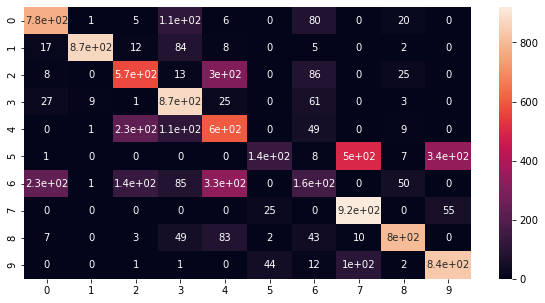

In [1028]:
print("Confusion matrix for Multinomial Naive Bayes\n")
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, y_pred_model2), annot=True)

From the confusion matrix, we can depict that predictions for class 5(Sandals) and class 6(Shirt) are worst with more prediction count lying in the othe class. Also, the prediction for class 6 seems to be confused into many other classes and shares that the model just cant seem to predict shirt clearly most of the time and is confused.

In [1052]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_model2))
precision.append(precision_score(y_test,y_pred_model2, average=None))
recall.append(recall_score(y_test, y_pred_model2, average=None))


Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.78      0.75      1000
           1       0.99      0.87      0.93      1000
           2       0.59      0.57      0.58      1000
           3       0.66      0.87      0.75      1000
           4       0.44      0.60      0.51      1000
           5       0.66      0.14      0.23      1000
           6       0.32      0.16      0.22      1000
           7       0.60      0.92      0.73      1000
           8       0.87      0.80      0.84      1000
           9       0.68      0.84      0.75      1000

    accuracy                           0.66     10000
   macro avg       0.65      0.66      0.63     10000
weighted avg       0.65      0.66      0.63     10000



The classification report concludes the above reasoning with proof. As you can see that precision for class 4 and class 6 are worst where less than 50% times the classes that are predicted as them are correct. The rest of the classes seems to be fairly predicted and the model performs on a average scale.

In [36]:
from sklearn.neighbors import KNeighborsClassifier

for n in range(7,31,2):
    model3 = KNeighborsClassifier(n_neighbors=n)

    model3.fit(X_train, y_train)

    y_pred_model3 = model3.predict(X_test)

    print("Accuracy score for K-Nearest Neighbors Classifier initially with ",n," neighbors: ", accuracy_score(y_pred_model3, y_test, normalize=True)*100)

Accuracy score for K-Nearest Neighbors Classifier initially with  7  neighbors:  85.39999999999999
Accuracy score for K-Nearest Neighbors Classifier initially with  9  neighbors:  85.19
Accuracy score for K-Nearest Neighbors Classifier initially with  11  neighbors:  84.95
Accuracy score for K-Nearest Neighbors Classifier initially with  13  neighbors:  84.68
Accuracy score for K-Nearest Neighbors Classifier initially with  15  neighbors:  84.61999999999999
Accuracy score for K-Nearest Neighbors Classifier initially with  17  neighbors:  84.41
Accuracy score for K-Nearest Neighbors Classifier initially with  19  neighbors:  84.27
Accuracy score for K-Nearest Neighbors Classifier initially with  21  neighbors:  84.07
Accuracy score for K-Nearest Neighbors Classifier initially with  23  neighbors:  83.94
Accuracy score for K-Nearest Neighbors Classifier initially with  25  neighbors:  83.75
Accuracy score for K-Nearest Neighbors Classifier initially with  27  neighbors:  83.82
Accuracy s

In [37]:
param = {'n_neighbors': [11,23,27,31,33,35],
            'metric': ['euclidean', 'minkowski', 'manhattan']}

model3_randomsearch = RandomizedSearchCV(estimator = KNeighborsClassifier(),
                            param_distributions = param,
                           n_iter = 10,
                           cv=cv,
                           scoring='accuracy',
                            random_state=42,
                            verbose= 2)

model3_randomsearch.fit(X_train, y_train)

print("Best parameters for K-Nearest Neighbors Classifier: ", model3_randomsearch.best_params_)
print("Best Cross-validation score for K-Nearest Neighbors Classifier: ", model3_randomsearch.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ...................metric=euclidean, n_neighbors=11; total time=  36.6s
[CV] END ...................metric=euclidean, n_neighbors=11; total time=  36.0s
[CV] END ...................metric=euclidean, n_neighbors=11; total time=  35.1s
[CV] END ...................metric=euclidean, n_neighbors=23; total time=  34.4s
[CV] END ...................metric=euclidean, n_neighbors=23; total time=  34.6s
[CV] END ...................metric=euclidean, n_neighbors=23; total time=  34.8s
[CV] END ...................metric=minkowski, n_neighbors=27; total time=  35.2s
[CV] END ...................metric=minkowski, n_neighbors=27; total time=  35.3s
[CV] END ...................metric=minkowski, n_neighbors=27; total time=  34.5s
[CV] END ...................metric=euclidean, n_neighbors=35; total time=  35.5s
[CV] END ...................metric=euclidean, n_neighbors=35; total time=  37.1s
[CV] END ...................metric=euclidean, n_

In [1066]:
model3 = model3_randomsearch.best_estimator_

y_pred_model3 = model3.predict(X_test)
accuracy.append(accuracy_score(y_pred_model3, y_test, normalize=True)*100)

print("Accuracy score for K-Neighbors Classifier: ", accuracy_score(y_pred_model3, y_test, normalize=True)*100)

Accuracy score for K-Neighbors Classifier:  84.95


Confusion matrix for KNN



<AxesSubplot:>

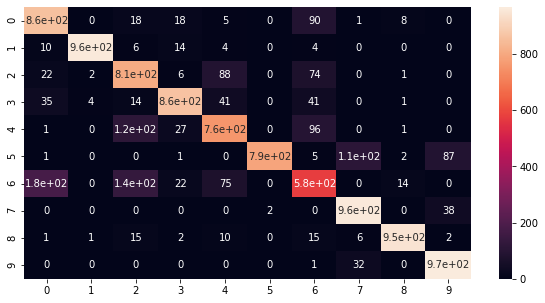

In [1030]:
print("Confusion matrix for KNN\n")
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, y_pred_model3), annot=True)

From the confusion matrix, we can see that the class with maximum variations in prediction is class 6(Shirt). Class 4(Coat) and class 5(Sandal) has a little variation which is considerable.

In [1060]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_model3))
precision.append(precision_score(y_test,y_pred_model3, average=None))
recall.append(recall_score(y_test, y_pred_model3, average=None))


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82      1000
           1       0.99      0.96      0.98      1000
           2       0.73      0.81      0.76      1000
           3       0.91      0.86      0.88      1000
           4       0.77      0.76      0.77      1000
           5       1.00      0.79      0.88      1000
           6       0.64      0.58      0.61      1000
           7       0.86      0.96      0.91      1000
           8       0.97      0.95      0.96      1000
           9       0.88      0.97      0.92      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



The Classification report, says that for class 5(Sandal) whatever the model ever predicted as Sandal is all correct followed by class 1(Trousers)  with 99% precision.

In [13]:
from sklearn.svm import SVC

model4 = SVC()

model4.fit(X_train, y_train)

y_pred_model4 = model4.predict(X_test)

print("Accuracy score for SVM Classifier initially: ", accuracy_score(y_pred_model4, y_test, normalize=True)*100)

Accuracy score for SVM Classifier initially:  88.28


In [14]:
params = {'C': [0.01, 0.1, 1.0, 10],
         'gamma': [0.01, 0.1, 1.0],
         'kernel': ['rbf', 'poly', 'sigmoid']}

model4_randomsearch = RandomizedSearchCV(estimator=SVC(), 
                                         param_distributions=params, 
                                        n_iter=10,
                                        cv=cv,
                                        scoring='accuracy',
                                         verbose=2,
                                        random_state=42)

model4_randomsearch.fit(X_train, y_train)

print("Best parameters for SVM Classifier: ", model4_randomsearch.best_params_)
print("Best Cross-validation score for SVM Classifier: ", model4_randomsearch.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ....................C=10, gamma=1.0, kernel=sigmoid; total time=70.0min
[CV] END ...................C=10, gamma=1.0, kernel=sigmoid; total time=175.0min
[CV] END ....................C=10, gamma=1.0, kernel=sigmoid; total time=54.3min
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time= 5.9min
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time= 5.7min
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time= 5.8min
[CV] END ...................C=1.0, gamma=1.0, kernel=sigmoid; total time=53.4min
[CV] END ...................C=1.0, gamma=1.0, kernel=sigmoid; total time=53.3min
[CV] END ...................C=1.0, gamma=1.0, kernel=sigmoid; total time=52.9min
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=29.9min
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=29.8min
[CV] END ........................C=10, gamma=0.1

In [1067]:
model4 = model4_randomsearch.best_estimator_

y_pred_model4 = model4.predict(X_test)
accuracy.append(accuracy_score(y_pred_model4, y_test, normalize=True)*100)

print("Accuracy score for SVM Classifier: ", accuracy_score(y_pred_model4, y_test, normalize=True)*100)

Accuracy score for SVM Classifier:  88.07000000000001


In [9]:
from sklearn.svm import SVC
model4 = SVC(kernel='poly', gamma=0.1, C=0.1)
model4.fit(X_train, y_train)

y_pred_model4 = model4.predict(X_test)
accuracy.append(accuracy_score(y_pred_model4, y_test, normalize=True)*100)

print("Accuracy score for SVM Classifier: ", accuracy_score(y_pred_model4, y_test, normalize=True)*100)

Accuracy score for SVM Classifier:  88.07000000000001


Confusion matrix for SVM



<AxesSubplot:>

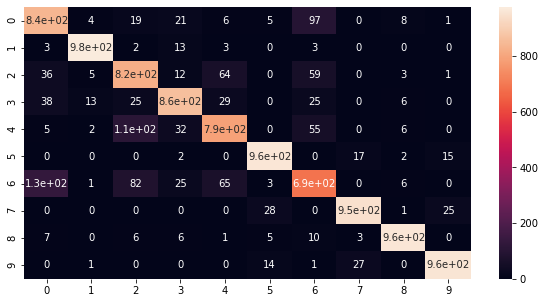

In [1032]:
print("Confusion matrix for SVM\n")
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, y_pred_model4), annot=True)

For SVM we can see that most of the classes are predicted correctly with high true positive values. However, class 6(Shirt) predictions are comparitively weak and shows a little diversion and mixes it up with class 0(Top/T-shirt). Also, class 4(Coat) shows few diversions with class 2(Pullover).

In [1061]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_model4))
precision.append(precision_score(y_test,y_pred_model4, average=None))
recall.append(recall_score(y_test, y_pred_model4, average=None))


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.82      1000
           1       0.97      0.98      0.98      1000
           2       0.77      0.82      0.79      1000
           3       0.89      0.86      0.87      1000
           4       0.82      0.79      0.81      1000
           5       0.95      0.96      0.95      1000
           6       0.73      0.69      0.71      1000
           7       0.95      0.95      0.95      1000
           8       0.97      0.96      0.96      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



From the classification report, we can conclude that class 6(Shirt) has poor recall score as many images are falsely classified as another class. 

In [24]:
from sklearn.tree import DecisionTreeClassifier

model5 = DecisionTreeClassifier()

model5.fit(X_train, y_train)

y_pred_model5 = model5.predict(X_test)

print("Accuracy score for Decision Tree Classifier initially: ", accuracy_score(y_pred_model5, y_test, normalize=True)*100)

Accuracy score for Decision Tree Classifier initially:  78.91


In [28]:
param = {'max_depth': [50, 70, 80, 90, 100, 120],
         'max_features': ['auto', 'sqrt'],
         'min_samples_leaf': [1,2,4],
         'min_samples_split': [2,5,8]
        }

model5_randomsearch = RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                                    param_distributions=param, 
                                        n_iter=10,
                                        cv=cv,
                                        scoring='accuracy',
                                         verbose=2,
                                        random_state=42)

model5_randomsearch.fit(X_train, y_train)

print("Best parameters for Decision Tree Classifier: ", model5_randomsearch.best_params_)
print("Best Cross-validation score for Decision Tree Classifier: ", model5_randomsearch.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=8; total time=   1.0s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=8; total time=   1.0s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=8; total time=   0.9s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.9s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   1.0s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   1.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.9s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.9s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.9s
[CV] END max_depth

In [1038]:
model5 = model5_randomsearch.best_estimator_

y_pred_model5 = model5.predict(X_test)
accuracy.append(accuracy_score(y_pred_model5, y_test, normalize=True)*100)

print("Accuracy score for Decision Tree Classifier: ", accuracy_score(y_pred_model5, y_test, normalize=True)*100)

Accuracy score for Decision Tree Classifier:  78.22


Confusion matrix for Decision Tree Classifier



<AxesSubplot:>

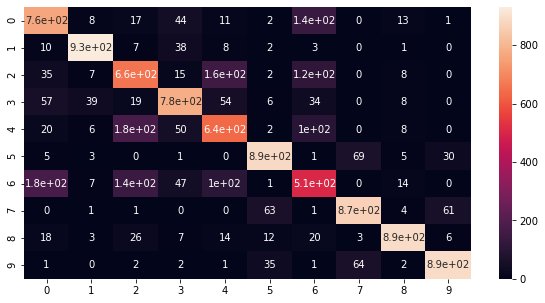

In [1037]:
print("Confusion matrix for Decision Tree Classifier\n")
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, y_pred_model5), annot=True)

For Decision Tree, many classes are showing poor to fair correct predictions. The worst of all is predictions for class 6(Shirt) with only half True predictions. It apparently is misclassified into class 0(Top/T-shirt), class 2(Pullover) and class 4(Coat). Class 4(Coat) and Class 2(Pullover) also has poor prediction score with some diversions.

In [1062]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_model5))
precision.append(precision_score(y_test,y_pred_model5, average=None))
recall.append(recall_score(y_test, y_pred_model5, average=None))


Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.77      0.73      1000
           1       0.93      0.93      0.93      1000
           2       0.63      0.66      0.64      1000
           3       0.79      0.78      0.79      1000
           4       0.65      0.64      0.64      1000
           5       0.88      0.89      0.88      1000
           6       0.55      0.51      0.53      1000
           7       0.86      0.87      0.87      1000
           8       0.93      0.89      0.91      1000
           9       0.90      0.89      0.90      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



From the classification report, class 6(Shirt) has poor precision and recall score. In fact, its worst scores as only half of the predictions are correct and half are falsely classified into something else.

In [8]:
from sklearn.ensemble import RandomForestClassifier

model7 = RandomForestClassifier()

model7.fit(X_train, y_train)

y_pred_model7 =  model7.predict(X_test)

print("Accuracy score for Random Forest Classifier: ", accuracy_score(y_pred_model7, y_test, normalize=True)*100)

Accuracy score for Random Forest Classifier:  87.64


In [30]:
param = {'n_estimators': [200,300,400,500,600,700,800],
        'max_features': ['auto', 'sqrt'],
        'max_depth': [60,70,80,90,100],
        'min_samples_leaf': [1,2,4],
        'min_samples_split': [2,5,8]}

model7_randomsearch = RandomizedSearchCV(estimator=RandomForestClassifier(), 
                                         param_distributions=param, 
                                        n_iter=10,
                                        cv=cv,
                                        scoring='accuracy',
                                         verbose=2,
                                        random_state=42)

model7_randomsearch.fit(X_train, y_train)

print("Best parameters for Random Forest Classifier: ", model7_randomsearch.best_params_)
print("Best Cross-validation score for Random Forest Classifier: ", model7_randomsearch.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time= 1.5min
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time= 1.4min
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time= 1.4min
[CV] END max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time= 5.8min
[CV] END max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time= 5.8min
[CV] END max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=72.8min
[CV] END max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time= 5.8min
[CV] END max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=8

In [32]:
model7 = model7_randomsearch.best_estimator_

y_pred_model7 = model7.predict(X_test)
accuracy.append(accuracy_score(y_pred_model7, y_test, normalize=True)*100)

print("Accuracy score for Random Forest Classifier: ", accuracy_score(y_pred_model7, y_test, normalize=True)*100)

Accuracy score for Random Forest Classifier:  87.81


Confusion matrix for Random Forest Classifier



<AxesSubplot:>

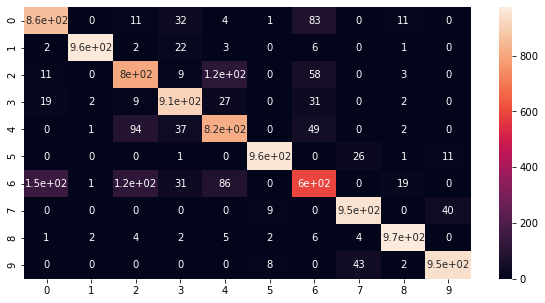

In [1040]:
print("Confusion matrix for Random Forest Classifier\n")
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, y_pred_model7), annot=True)

For Random Forest Classifier, Class 6(Shirt) is again has poor prediction score with many diversion into class 0 and class 2. All other classes have a decent prediction score.

In [1063]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_model7))
precision.append(precision_score(y_test,y_pred_model7, average=None))
recall.append(recall_score(y_test, y_pred_model7, average=None))


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.77      0.80      0.79      1000
           3       0.87      0.91      0.89      1000
           4       0.77      0.82      0.79      1000
           5       0.98      0.96      0.97      1000
           6       0.72      0.59      0.65      1000
           7       0.93      0.95      0.94      1000
           8       0.96      0.97      0.97      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



From the classification report, all the scores seems pretty reasonable except the recall call for the class 6(Shirt) indicating that more classes are falsely classified as something else.

In [33]:
from sklearn.neural_network import MLPClassifier

model8 = MLPClassifier()

model8.fit(X_train, y_train)

y_pred_model8 = model8.predict(X_test)

print("Accuracy score for MLP Classifier: ", accuracy_score(y_pred_model8, y_test, normalize=True)*100)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy score for MLP Classifier:  88.24


In [34]:
param = {'hidden_layer_sizes': [(10,), (20,)],
        'activation': ['relu', 'tanh', 'logistic'],
        'solver': ['sgd', 'adam'],
        'alpha': [0.001, 0.01, 0.05],
        'learning_rate': ['constant', 'adaptive']}

model8_randomsearch = RandomizedSearchCV(estimator=MLPClassifier(),
                                        param_distributions=param, 
                                        n_iter=10,
                                        cv=cv,
                                        scoring='accuracy',
                                         verbose=2,
                                        random_state=42)

model8_randomsearch.fit(X_train, y_train)

print("Best parameters for MLP Classifier: ", model8_randomsearch.best_params_)
print("Best Cross-validation score for MLP Classifier: ", model8_randomsearch.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd; total time= 1.5min


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd; total time= 1.5min


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd; total time= 1.5min


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd; total time=518.5min


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd; total time= 1.9min


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd; total time= 1.7min


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd; total time= 1.3min


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd; total time= 1.4min


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd; total time= 1.3min


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd; total time= 1.3min


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd; total time= 1.3min


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd; total time= 1.3min


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd; total time= 1.5min


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd; total time= 1.6min


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd; total time= 1.6min


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd; total time= 1.3min


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd; total time= 1.3min


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd; total time= 1.3min


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd; total time= 1.3min


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd; total time= 1.3min


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd; total time= 1.3min


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd; total time= 1.3min


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd; total time= 1.4min


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd; total time= 1.3min


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd; total time= 1.5min


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd; total time= 1.5min


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd; total time= 1.5min


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd; total time= 1.5min


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd; total time= 1.6min


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd; total time= 1.5min
Best parameters for MLP Classifier:  {'solver': 'sgd', 'learning_rate': 'constant', 'hidden_layer_sizes': (20,), 'alpha': 0.001, 'activation': 'tanh'}
Best Cross-validation score for MLP Classifier:  0.8685499999999999


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [35]:
model8 = model8_randomsearch.best_estimator_

y_pred_model8 = model8.predict(X_test)
accuracy.append(accuracy_score(y_pred_model8, y_test, normalize=True)*100)

print("Accuracy score for MLP Classifier: ", accuracy_score(y_pred_model8, y_test, normalize=True)*100)

Accuracy score for MLP Classifier:  86.61


Confusion matrix for Multilayer Perceptron Classifier



<AxesSubplot:>

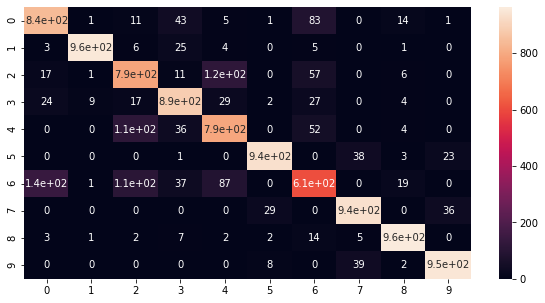

In [1041]:
print("Confusion matrix for Multilayer Perceptron Classifier\n")
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, y_pred_model8), annot=True)

With the trend, Class 6(Shirt) has diversions which are classified into other classes majorly into class 0(Top/T-shirt) and class 2(Pullover). Class 2(Pullover) and class 4(Coat) show that they are sometimes classified into each other.

In [1064]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_model8))
precision.append(precision_score(y_test,y_pred_model8, average=None))
recall.append(recall_score(y_test, y_pred_model8, average=None))


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1000
           1       0.99      0.96      0.97      1000
           2       0.75      0.79      0.77      1000
           3       0.85      0.89      0.87      1000
           4       0.76      0.79      0.78      1000
           5       0.96      0.94      0.95      1000
           6       0.72      0.61      0.66      1000
           7       0.92      0.94      0.93      1000
           8       0.95      0.96      0.96      1000
           9       0.94      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



The classification report indicates that the recall score for the class 6(shirt) is weak.

# Comparison between models
Let's compare the models to see which models performs best when precision and recal are at stakes

<ipython-input-1087-62ddcfebddd2>:13: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[j][i-4*j].set_xticks(X_axis,X)


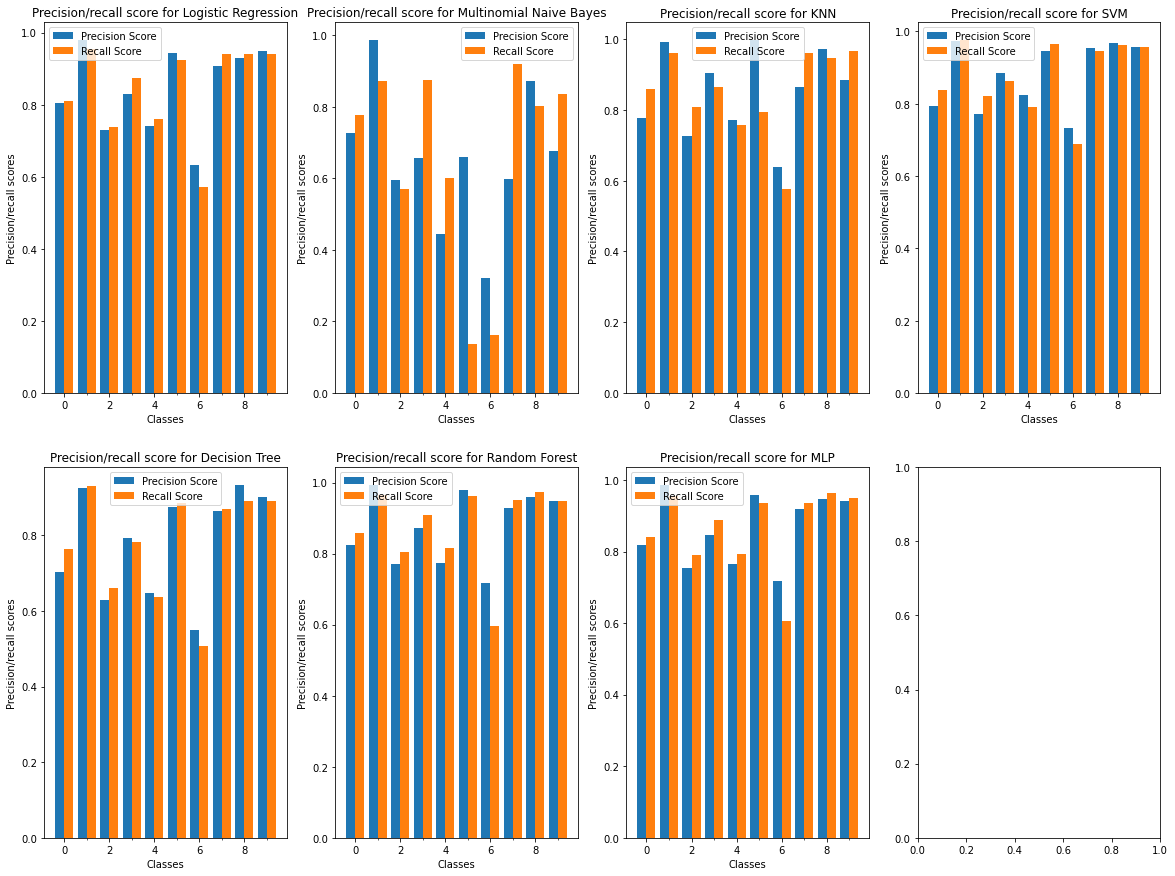

In [1087]:
titles = ['Logistic Regression', 'Multinomial Naive Bayes', 'KNN', 'SVM', 'Decision Tree', 'Random Forest', 'MLP']
X = [0,1,2,3,4,5,6,7,8,9]
X_axis = np.arange(10)

fig, ax = plt.subplots(2,4,figsize=(20,15))
j=0
for i in range(7):
    if i>3:
        j=1
        
    ax[j][i-4*j].bar(X_axis - 0.2, precision[i], 0.4, label = 'Precision Score')
    ax[j][i-4*j].bar(X_axis + 0.2, recall[i], 0.4, label = 'Recall Score')
    ax[j][i-4*j].set_xticks(X_axis,X)
    ax[j][i-4*j].set_xlabel('Classes')
    ax[j][i-4*j].set_ylabel("Precision/recall scores")
    ax[j][i-4*j].set_title("Precision/recall score for "+titles[i])
    ax[j][i-4*j].legend()

plt.show()

From the above graph we can see that class 6(Shirt) suffers the most in terms of precision and recall. For each model it is poorly classified. Though this is the case, it performs fairly for SVM model, with highest precision/ recall score among other models. The SVM model shows great scores for the rest of the classes too. Hence, SVM becomes a potential candidate for best model. Another potential candidate is Random Forest Classifier, since its precision/recall score for class 6 apparently is fair enough. Also other scores are pretty good.

Lets look at the accuracy scores between all models for further clarity.

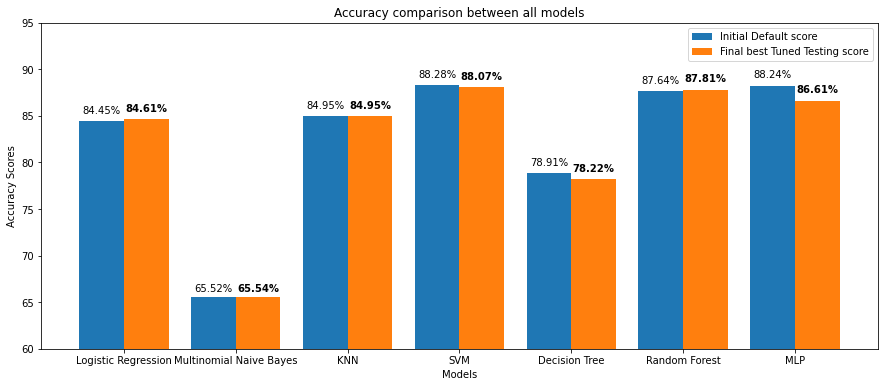

In [1097]:
X = ['Logistic Regression', 'Multinomial Naive Bayes', 'KNN', 'SVM', 'Decision Tree', 'Random Forest', 'MLP']
initial_score = [84.45, 65.52, 84.95, 88.28, 78.91, 87.64, 88.24]

X_axis = np.arange(7)

plt.figure(figsize=(15,6))
initial = plt.bar(X_axis - 0.2, initial_score, 0.4, label = 'Initial Default score')
final = plt.bar(X_axis + 0.2, accuracy, 0.4, label = 'Final best Tuned Testing score')

i = 0
for bar in initial:
    width = bar.get_width()
    height = bar.get_height()
    x, y = bar.get_xy()
    plt.text(x+width/2, y+height*1.01, str(initial_score[i])+'%', ha='center')
    i+=1
    
i = 0
for bar in final:
    width = bar.get_width()
    height = bar.get_height()
    x, y = bar.get_xy()
    plt.text(x+width/2, y+height*1.01, str(round(accuracy[i],2))+'%', ha='center', weight='bold')
    i+=1

plt.ylim([60,95])
plt.xticks(X_axis,X)
plt.xlabel('Models')
plt.ylabel("Accuracy Scores")
plt.title("Accuracy comparison between all models")
plt.legend()
plt.show()

As the potential candidates are SVM and Random Forest, from the graph clearly depicts the accuracy scores for bothe the models. It is clear the best baccuracy score among all the models is for SVM with 88.07%. As for the comparison between SVM and RF, SVM clearly wins here with slight difference. Hence, we select SVM as our best and final model for further testing of real life images.

# Testing real-life images
With SVM as our best model, let's test real-life images on our model. But before that, we need to load and pre-process the images into proper format for testing.

In [13]:
import matplotlib.image as mpimg

In [201]:
#Preprocessing real life test data same as before
actual_names = ["Sandal", "Bag", "Dress", "Shirt", 'Coat', 'Sneakers', 'Trouser', 'T-shirt/top', 'Ankle boot', 'Pullover']
test_samples = []
for i in range(1,11):
    sample = 'test_image_'+str(i)+'.jpg'
    sample = np.array(mpimg.imread(sample)) # reading numpy array of images
    sample = sample[::110,::110] # scaling down the dimensions
    sample = np.dot(sample[...,:3],[0.2989,0.5870,0.1140]) # coinverting to grayscale
    test_samples.append(sample)

test_samples = np.array(test_samples) # converting list to numpy array
samples = test_samples.copy()

We have pre-processed the data enough to be displayed as the initial data we used for training and testing. Lets have a look.

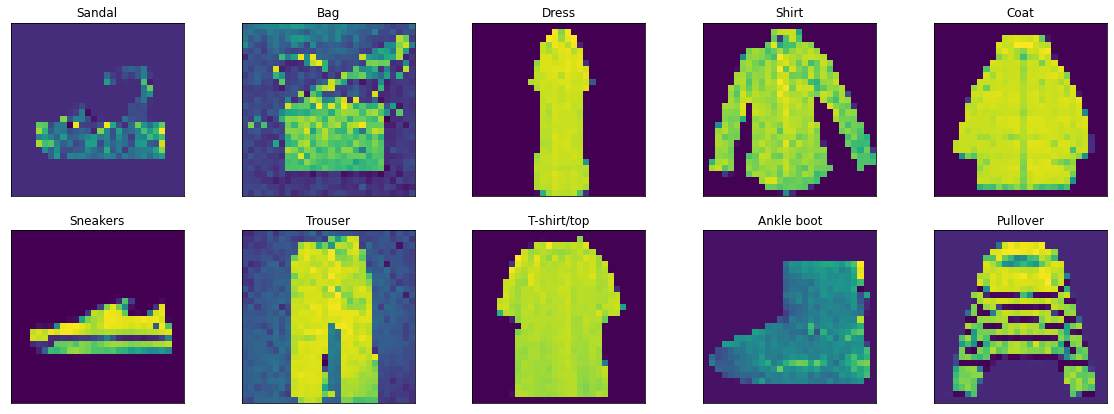

In [202]:
fig, ax = plt.subplots(2,5,figsize=(20,7))
j=0
for i in range(10):
    if i>4:  j=1
        
    ax[j][i-5*j].imshow(test_samples[i])
    ax[j][i-5*j].set(xticks=[], yticks=[])
    ax[j][i-5*j].set_title(actual_names[i])

plt.show()

In [203]:
# flatten the image array from 28*28 into 784
test_samples = test_samples.reshape((len(test_samples),28*28))

#normalize the data for faster computation
test_samples = test_samples/255

In [204]:
#lets check the shape of our final data that will be fed into model for testing
test_samples.shape

(10, 784)

In [205]:
result = model4.predict(test_samples).tolist()

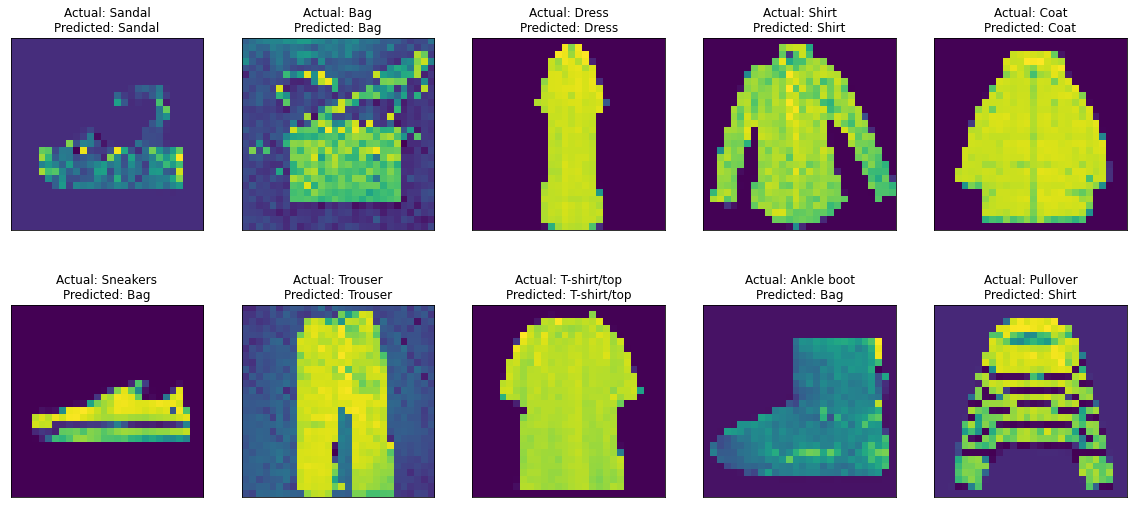

In [206]:
fig, ax = plt.subplots(2,5,figsize=(20,9))
j=0
for i in range(10):
    if i>4: j=1
        
    ax[j][i-5*j].imshow(samples[i])
    ax[j][i-5*j].set(xticks=[], yticks=[])
    ax[j][i-5*j].set_title("Actual: "+actual_names[i]+"\nPredicted: "+class_names[result[i]])

plt.show()

From the results we can see that 7/10 images are correctly identified. The ones that are not identified are sneakers, ankle boots and pullover. Both Sneaker and ankle boot are predicted bag which can indicate that the images taken lacks contrast and details and the model depicts it as almost a square and predicts bag for them. Also, the pullover is predicted as shirt and one of the reasons can be contrast and clarity. We can say that the images that are taken for testing can be improved in terms of clarity, background and contrast which can be one of the reasons that the model is unable to predict right classes for them. Also, real-life data can be wide and enormous that itself dictates the lack of training images for variety. 

## Application
Let us take the first image which has been classified correctly by our model. We take the training examples which belong to that class.

In [208]:
test_data = X_train[np.where(y_train==result[0])]

We try to find different variety within that class using Kmeans. Kmeans will make n, 7 for example, clusters where each cluster has similar sandals within them.

In [215]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 10, random_state=0).fit(test_data)
y_kmeans = kmeans.predict(test_data) 

Let us visualize the images from the formed clusters.

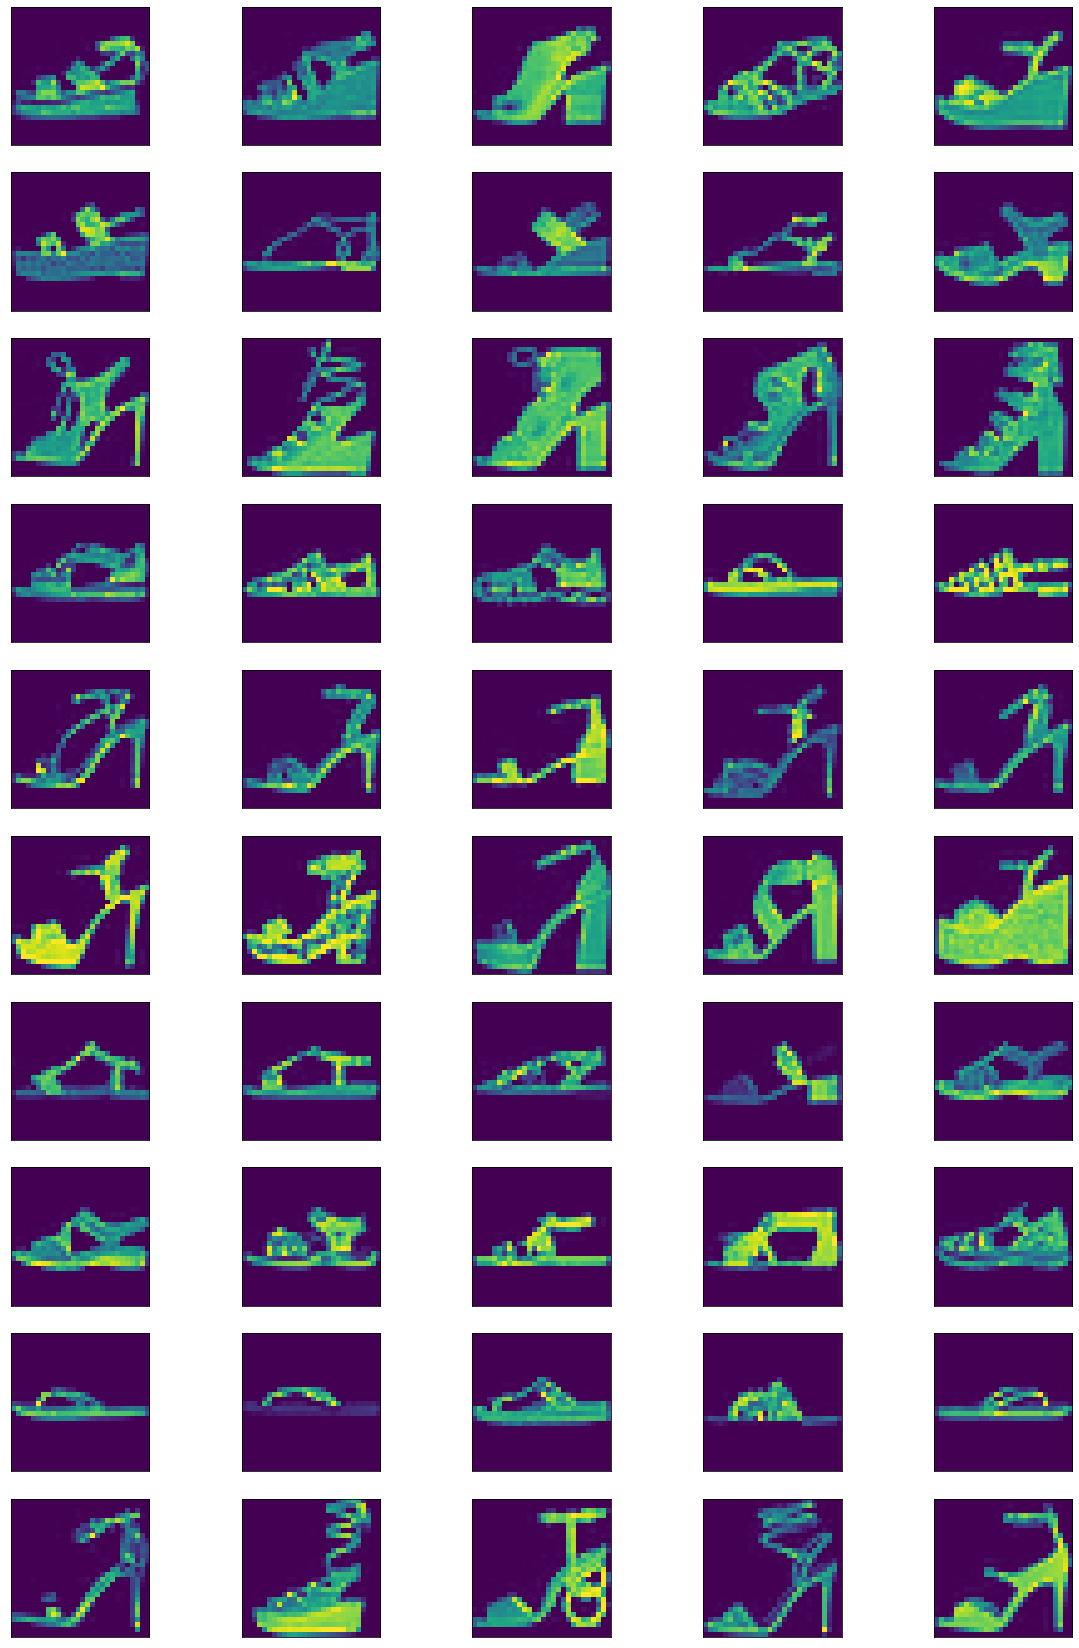

In [265]:
fig, ax = plt.subplots(10,5,figsize=(20,30))
for i in range(10):
    clus = test_data[np.where(y_kmeans==i)][:5]

    for j in range(5):
        temp = np.reshape(clus[j], (-1, 28))
        ax[i][j].imshow(temp)
        ax[i][j].set(xticks=[], yticks=[])

We will now try to train the sandal data with Kmeans' classified clusters as classes.

In [216]:
knn = KNeighborsClassifier(n_neighbors=9, algorithm='ball_tree')
knn.fit(test_data, y_kmeans)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=9)

Finally, we will feed the testing example and find it's K-closest neighbors indicating the K(5) items that are similar to the test sample.

In [217]:
res = knn.kneighbors([test_samples[0]], return_distance=True, n_neighbors=5)

The result will give us the distance of the similar samples from the test sample and their indices.

In [218]:
#We just take the indices to access the images from the training data.
list(res[1][0])

[3109, 3330, 3337, 4526, 1673]

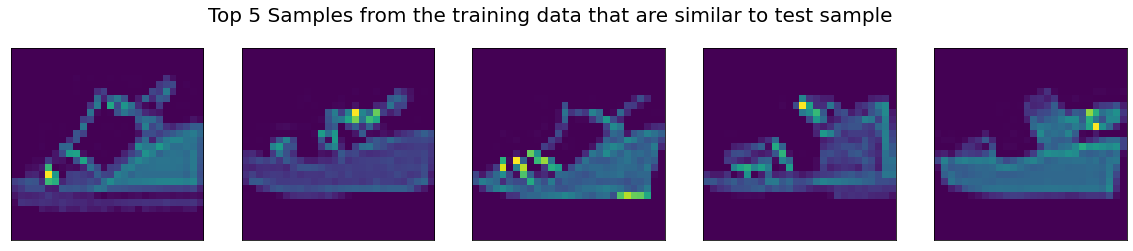

In [243]:
fig, ax = plt.subplots(1,5,figsize=(20,4))
fig.suptitle("Top 5 Samples from the training data that are similar to test sample", fontsize=20)  

for i,j in enumerate(list(res[1][0])):
    temp = np.reshape(test_data[j], (-1, 28))
    ax[i].imshow(temp)
    ax[i].set(xticks=[], yticks=[])
    
plt.show()